# Make some pretty maps of sampling stations

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import (
    nc_tools,
    viz_tools,
)
import datetime
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import datetime
import seaborn as sns
# import NEMO_tools as Nts
# from NEMO_tools import reporj_NEMOgrid
import csv

%matplotlib inline

/ocean/brogalla/GEOTRACES/analysis-birgit/cmocean-master/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


### Load relevant data:

Land mask

In [2]:
mask = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12_mask.nc')
tmask = mask.variables['tmask']
tmask = np.array(tmask[0,:,:,:])
mlons = mask.variables['nav_lon']
mlats = mask.variables['nav_lat']
mlons = np.array(mlons)
mlats = np.array(mlats)
cond = (tmask > 0.1) 
Z_masked = np.ma.masked_where(cond, tmask) 

Bathymetry:

In [3]:
mesh = nc.Dataset('/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/ANHA12/ANHA12_mesh1.nc')
mesh_lon = mesh.variables['nav_lon']
mesh_lat = mesh.variables['nav_lat']
mesh_bathy = mesh.variables['hdept'][0]

In [4]:
mesh_lon = np.array(mesh_lon)
mesh_lat = np.array(mesh_lat)
mesh_bathy = np.array(mesh_bathy)

In [5]:
cond2 = (mesh_bathy > 0.1)
bathy_masked = np.ma.masked_where(cond2, mesh_bathy)

Model river runoffs:

In [6]:
c = nc.Dataset('/ocean/brogalla/GEOTRACES/data/runoff/runoff_core_monthly_y2002.nc','r')
lon_rf = c.variables['nav_lon']
lat_rf = c.variables['nav_lat']
socoefr = c.variables['socoefr']
rf = c.variables['runoff'][0]

In [7]:
rf = np.array(rf)
lon_rf = np.array(lon_rf)
lat_rf = np.array(lat_rf)

In [8]:
rf = np.ma.masked_where(rf == 0.0, rf)
lon_rf = np.ma.masked_where(rf == 0.0, lon_rf)
lat_rf = np.ma.masked_where(rf == 0.0, lat_rf)

River station locations:

In [9]:
def read_csv(filename):
    ifile = open(filename,'rt', encoding='UTF8')
    CAA_data = csv.reader(ifile)
    lon_sta = []
    lat_sta = []
    sta_names = []
    
    i = 0
    for row in CAA_data:
        i += 1
        if i < 3:
            i == 2
        else:
            sta_names.append(str(row[1]))
            lat_sta.append(float(row[2]))
            lon_sta.append(float(row[3]))
    return sta_names, lat_sta, lon_sta

f1 = '/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/rivers/CAA_dissolved_rivers.csv'

sta_names, lat_sta, lon_sta = read_csv(f1)

In [10]:
print(lon_sta)
print(lat_sta)
print(sta_names)

[-80.44678, -78.6805, -84.98643, -86.98292, -88.491, -93.6242, -92.0369, -94.77833, -93.41615, -96.91716, -95.57955, -100.56831, -104.07575, -111.91609]
[73.76375, 73.6124, 72.99706, 73.79355, 74.511, 74.0153, 73.94447, 74.6926, 72.84905, 72.34122, 70.46961, 67.67628, 67.89301, 67.62417]
['Black Cliffs', 'Glacier River', 'Marcil Creek ', 'Saaqu River ', 'Devon Island', 'Cunningham River', 'Garnier River', 'Mecham River', 'Creswell River ', 'Le Feuvre Inlet', 'Pasley River', 'Simpson River', 'Ellice River', 'Tree River']


In [11]:
sta_names = ['Black Cliffs', 'Glacier', 'Marcil Creek ', 'Saaqu', 'Devon Island', 'Cunningham', \
             'Garnier', 'Mecham', 'Creswell', 'Le Feuvre Inlet', 'Pasley', 'Simpson', \
             'Ellice', 'Tree']

In [12]:
features = ['Beaufort Sea', 'Arctic Ocean', 'Kalaallit Nunaat','(Greenland)', 'Baffin Bay', 'Nunavut', \
           'Northwest','Territories']

In [13]:
lon_features = [-141, -120, -50, -50, -70, -108]
lat_features = [75.5, 84, 79.5, 78.5, 73, 66]

### Create plots

In [14]:
adjust_lon = np.array([-6,-1,-2,-2.5,-5,-10, \
                       -3.5,-7,-2,-8,-2,-1,\
                       -2,-2])
adjust_lat = np.array([0.65,-0.5,-0.5,-0.35,0.55,-0.6 \
                       ,0.30,0.3,-0.5,-0.7,-0.6,-0.8, \
                       -0.9,-0.8])

text_lat = lat_sta + adjust_lat
text_lon = lon_sta + adjust_lon

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: Matplo

IndexError: list index out of range

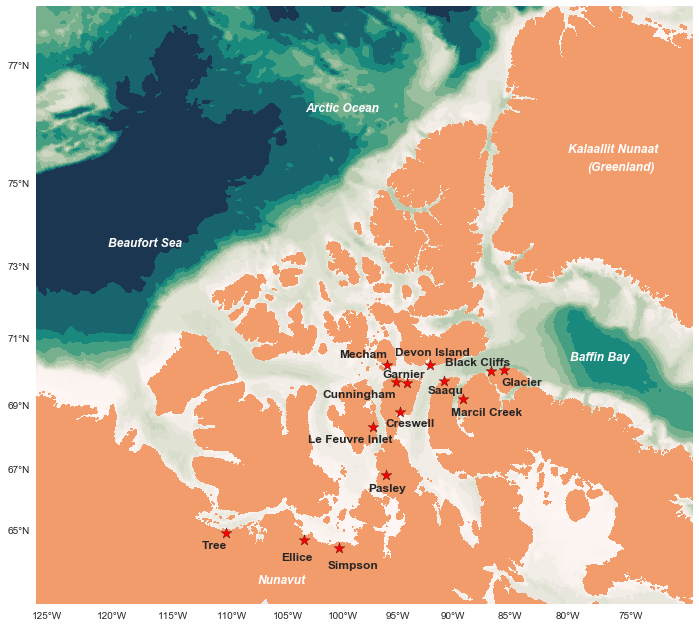

In [15]:
fig,ax = plt.subplots(figsize=(12,11))

proj=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -98, resolution='i', width=2.8e6, height=2.55e6)
# proj.drawcoastlines(linestyle='-', color=[0.35, 0.35, 0.35], linewidth=1, zorder=3)
proj.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj.drawmeridians(np.arange(int(-140),int(-30),5),labels=[0,0,0,1], linewidth=0.0)

# bathymetry:
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)
#bath = proj.pcolor(x_mesh, y_mesh, mesh_bathy, cmap=cmocean.cm.deep)
# bath = proj.contourf(x_mesh, y_mesh, mesh_bathy,12, cmap=cmocean.cm.tempo)
bath = proj.contourf(x_mesh, y_mesh, mesh_bathy,levels=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,\
                                                        200, 300, 400, 500, 600, \
                                                        900, 1200, 1600, 2000,\
                                                        2400, 3200, 4000], cmap=cmocean.cm.tempo)

# apply land mask:
x2, y2 = proj(mlons, mlats)
z2 = Z_masked[0,:,:]
proj.pcolor(x2,y2,z2, vmin=-1, vmax = 0.3, cmap=cmocean.cm.matter_r)#gray_r)

# river stations:
x_sta, y_sta = proj(lon_sta, lat_sta)
proj.scatter(x_sta, y_sta, marker='*',s=130,zorder=3, c='r', edgecolor='k', label= 'Stations sampled')

# # model rivers:
# x_rf, y_rf = proj(lon_rf, lat_rf)
# proj.scatter(x_rf, y_rf, marker='.', s=60, zorder=3, c='k', label='Rivers included in model')

# station names:
text_x, text_y = proj(text_lon, text_lat)
for i in range(len(sta_names)):
    plt.text(text_x[i], text_y[i], sta_names[i], fontsize=12, fontweight='bold')
    
# features:
textx, texty = proj(lon_features, lat_features)
for i in range(len(features)):
    plt.text(textx[i], texty[i], features[i], fontsize=12, fontweight='bold', fontstyle='italic', color='w')

#---------------------
    
cbaxes = fig.add_axes([0.975, 0.15, 0.02, 0.7]) 

CBar = plt.colorbar(bath, ax=ax, cax=cbaxes) 
# ax.set_title('Rivers in the Canadian Arctic Archipelago')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')
a = CBar.set_label('Ocean depth [m]', fontsize=12)
CBar.ax.tick_params(axis='y', length=0)

fig.savefig('river_map.png',bbox_inches='tight')

### Names connected with lines

In [16]:
sta_names = ['Black Cliffs', 'Glacier', 'Marcil Creek ', 'Saaqu', 'Devon Island', 'Cunningham', \
             'Garnier', 'Mecham', 'Creswell', 'Le Feuvre Inlet', 'Pasley', 'Simpson', \
             'Ellice', 'Tree']

In [17]:
adjust_lon = np.array([0,-1,0,-5.5,-5,-13, \
                       -4.5,-12,0,-9.5,-2,-1,\
                       -2,-2])
adjust_lat = np.array([0.85,-1.0,-1.6,-0.65,1.6,-1.15 \
                       ,1.40,0.95,-1.1,-1.3,-0.7,-0.8, \
                       -0.9,-0.9])

text_lat = lat_sta + adjust_lat
text_lon = lon_sta + adjust_lon

In [18]:
print(text_lat)
print(text_lon)

[ 74.61375  72.6124   71.39706  73.14355  76.111    72.8653   75.34447
  75.6426   71.74905  71.04122  69.76961  66.87628  66.99301  66.72417]
[ -80.44678  -79.6805   -84.98643  -92.48292  -93.491   -106.6242   -96.5369
 -106.77833  -93.41615 -106.41716  -97.57955 -101.56831 -106.07575
 -113.91609]


In [19]:
print(lat_sta)
print(lon_sta)

[73.76375, 73.6124, 72.99706, 73.79355, 74.511, 74.0153, 73.94447, 74.6926, 72.84905, 72.34122, 70.46961, 67.67628, 67.89301, 67.62417]
[-80.44678, -78.6805, -84.98643, -86.98292, -88.491, -93.6242, -92.0369, -94.77833, -93.41615, -96.91716, -95.57955, -100.56831, -104.07575, -111.91609]


In [20]:
text2_lat = [74.16375, 72.8124, 71.79706, 73.44355, 75.681, 73.4653, \
             75.12447, 75.6926, 72.14905, 71.81122, 70.46961, 67.67628, \
             67.89301, 67.62417] # 67.18628,\67.44301, 67.04917]
text2_lon = [-77.44678, -77.1995, -83.98643, -88.48292, -87.191, -96.6242,\
             -92.9369, -99.77833, -92.41615, -97.01716, -95.57955, -100.56831,\
             -104.07575, -111.91609] # -99.16831,\-104.17575, -111.91609]

In [21]:
lon_features = [-145, -125, -54, -54, -72, -108, -133, -132]
lat_features = [74, 84, 79.5, 78.5, 72.5, 66, 67, 66.5]

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: Matplo

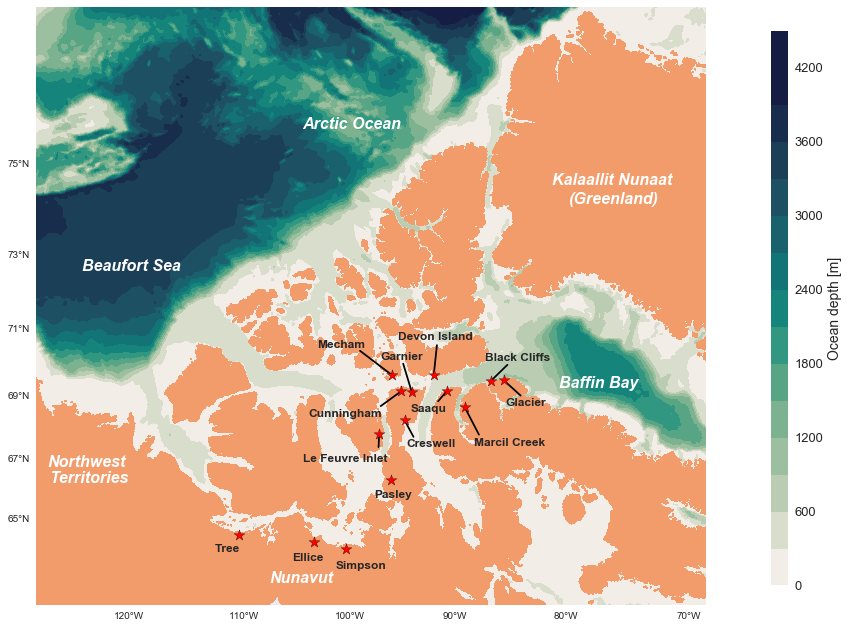

In [22]:
fig,ax = plt.subplots(figsize=(12,11))

proj=Basemap(projection='eqdc',lat_0 = 77.5, lon_0 = -98, resolution='i', width=3.0e6, height=2.68e6)#width=2.8e6, height=2.55e6)
# proj.drawcoastlines(linestyle='-', color=[0.35, 0.35, 0.35], linewidth=1, zorder=3)
proj.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0)

# bathymetry:
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)
#bath = proj.pcolor(x_mesh, y_mesh, mesh_bathy, cmap=cmocean.cm.deep)
bath = proj.contourf(x_mesh, y_mesh, mesh_bathy,15, cmap=cmocean.cm.tempo, vmin =0 , vmax = 4000)
# bath = proj.contourf(x_mesh, y_mesh, mesh_bathy,levels=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,\
#                                                         200, 300, 400, 500, 600, \
#                                                         900, 1200, 1600, 2000,\
#                                                         2400, 3200, 4000], cmap=cmocean.cm.tempo)

# apply land mask:
x2, y2 = proj(mlons, mlats)
z2 = Z_masked[0,:,:]
proj.pcolor(x2,y2,z2, vmin=-1, vmax = 0.3, cmap=cmocean.cm.matter_r)#gray_r)

# river stations:
x_sta, y_sta = proj(lon_sta, lat_sta)
proj.scatter(x_sta, y_sta, marker='*',s=130,zorder=3, c='r', edgecolor='k', label= 'Stations sampled')

# # model rivers:
# x_rf, y_rf = proj(lon_rf, lat_rf)
# proj.scatter(x_rf, y_rf, marker='.', s=60, zorder=3, c='k', label='Rivers included in model')

# station names:
text_x, text_y = proj(text_lon, text_lat)
text2_x, text2_y = proj(text2_lon, text2_lat) #lines
for i in range(len(sta_names)):
    plt.text(text_x[i], text_y[i], sta_names[i], fontsize=12, fontweight='bold')
    plt.plot([text2_x[i], x_sta[i]], [text2_y[i], y_sta[i]], '-k')
    
# features:
textx, texty = proj(lon_features, lat_features)
for i in range(len(features)):
    plt.text(textx[i], texty[i], features[i], fontsize=16, fontweight='bold', fontstyle='italic', color='w')

#---------------------
cbaxes = fig.add_axes([0.975, 0.15, 0.02, 0.7]) 

CBar = plt.colorbar(bath, ax=ax, cax=cbaxes) 
# ax.set_title('Rivers in the Canadian Arctic Archipelago')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')
a = CBar.set_label('Ocean depth [m]', fontsize=14)
CBar.ax.tick_params(axis='y', length=0, labelsize=13)

fig.savefig('river_map2.png',bbox_inches='tight')

# River stations + CAA stations:

In [23]:
import stations

In [24]:
CAA1 = stations.CAA1()
CAA2 = stations.CAA2()
CAA3 = stations.CAA3()
CAA4 = stations.CAA4()
CAA5 = stations.CAA5()
CAA6 = stations.CAA6()
CAA7 = stations.CAA7()
CAA8 = stations.CAA8()
CAA9 = stations.CAA9()
CB1 = stations.CB1()
CB2 = stations.CB2()
CB3 = stations.CB3()
CB4 = stations.CB4()
BB1 = stations.BB1()
BB2 = stations.BB2()
BB3 = stations.BB3()
K1 = stations.K1()
LS2 = stations.LS2()
names = ['CAA1', 'CAA2', 'CAA3', 'CAA4', 'CAA5', 'CAA6', 'CAA7', 'CAA8', 'CAA9', \
         'CB1', 'CB2', 'CB3', 'CB4', 'BB1', 'BB2', 'BB3', 'K1', 'LS2']
lon_sta2 = [CAA1.lon, CAA2.lon, CAA3.lon, CAA4.lon, CAA5.lon, CAA6.lon, CAA7.lon, CAA8.lon, CAA9.lon, \
        CB1.lon, CB2.lon, CB3.lon, CB4.lon, BB1.lon, BB2.lon, BB3.lon, K1.lon, LS2.lon]
lat_sta2 = [CAA1.lat, CAA2.lat, CAA3.lat, CAA4.lat, CAA5.lat, CAA6.lat, CAA7.lat, CAA8.lat, CAA9.lat, \
        CB1.lat, CB2.lat, CB3.lat, CB4.lat, BB1.lat, BB2.lat, BB3.lat, K1.lat, LS2.lat]

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: Matplo

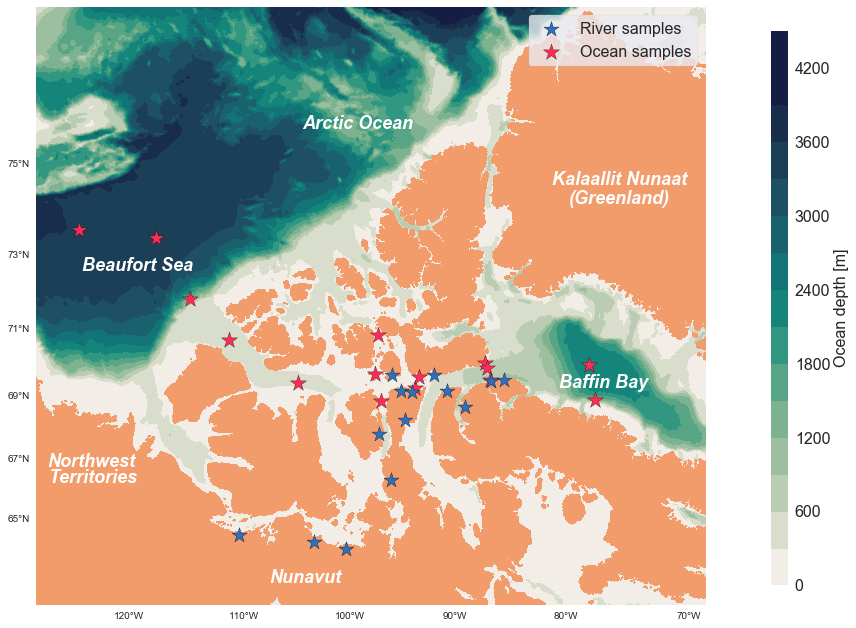

In [25]:
fig,ax = plt.subplots(figsize=(12,11))

proj=Basemap(projection='eqdc',lat_0 = 77.5, lon_0 = -98, resolution='i', width=3.0e6, height=2.68e6)
proj.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0)

# bathymetry:
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)
bath = proj.contourf(x_mesh, y_mesh, mesh_bathy,15, cmap=cmocean.cm.tempo, vmin =0 , vmax = 4000)
# bath = proj.contourf(x_mesh, y_mesh, mesh_bathy,levels=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,\
#                                                         200, 300, 400, 500, 600, \
#                                                         900, 1200, 1600, 2000,\
#                                                         2400, 3200, 4000], cmap=cmocean.cm.tempo)

# apply land mask:
x2, y2 = proj(mlons, mlats)
z2 = Z_masked[0,:,:]
proj.pcolor(x2,y2,z2, vmin=-1, vmax = 0.3, cmap=cmocean.cm.matter_r)#gray_r)

# river stations:
x_sta, y_sta = proj(lon_sta, lat_sta)
proj.scatter(x_sta, y_sta, marker='*',s=250,zorder=3, c=sns.xkcd_rgb['medium blue'], \
             edgecolor='k', label= 'River samples')

# CAA stations:
x_sta2, y_sta2 = proj(lon_sta2, lat_sta2)
proj.scatter(x_sta2, y_sta2, marker='*',s=280,zorder=2, c=sns.xkcd_rgb['reddish pink'], \
             edgecolor='k', label= 'Ocean samples')


# # station names:
# text_x, text_y = proj(text_lon, text_lat)
# text2_x, text2_y = proj(text2_lon, text2_lat) #lines
# for i in range(len(sta_names)):
#     plt.text(text_x[i], text_y[i], sta_names[i], fontsize=14, fontweight='bold')
#     plt.plot([text2_x[i], x_sta[i]], [text2_y[i], y_sta[i]], '-k')
    
# features:
textx, texty = proj(lon_features, lat_features)
for i in range(len(features)):
    plt.text(textx[i], texty[i], features[i], fontsize=18, fontweight='bold', fontstyle='italic', color='w')

#---------------------
cbaxes = fig.add_axes([0.975, 0.15, 0.02, 0.7]) 

CBar = plt.colorbar(bath, ax=ax, cax=cbaxes) 
#ax.set_title('Sample stations in the Canadian Arctic Archipelago', fontsize = 18)
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')
a = CBar.set_label('Ocean depth [m]', fontsize=16)
CBar.ax.tick_params(axis='y', length=0, labelsize=16)
ax.legend(fontsize=16, loc=1, frameon=True)

fig.savefig('trans_all_stations_notags.png',dpi=300,bbox_inches='tight', transparent=True)

# River sampling stations + river classification

In [26]:
import seaborn as sns
sns.set_context('poster')

In [38]:
c = nc.Dataset('/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/rivers/river_class_201807.nc','r')

In [39]:
river_class = c.variables['rclass']

In [40]:
regions = ['Normal rivers','Glacial rivers','Continental rivers']
clev = [1,2,3,4]

In [41]:
river_class = np.array(river_class)

In [42]:
features2 = ['Beaufort Sea', 'Arctic Ocean', 'Kalaallit Nunaat','(Greenland)', 'Baffin Bay']
lon_features2 = [-145, -125, -59, -59, -72]
lat_features2 = [75.3, 84, 79.5, 78.5, 72.9]

In [43]:
hfont = {'fontname':'Helvetica'}
plt.rcParams['font.family'] = 'arial'

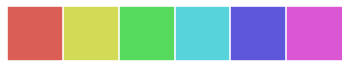

In [44]:
sns.palplot(sns.color_palette("hls"))

In [45]:
import matplotlib

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: Matplo

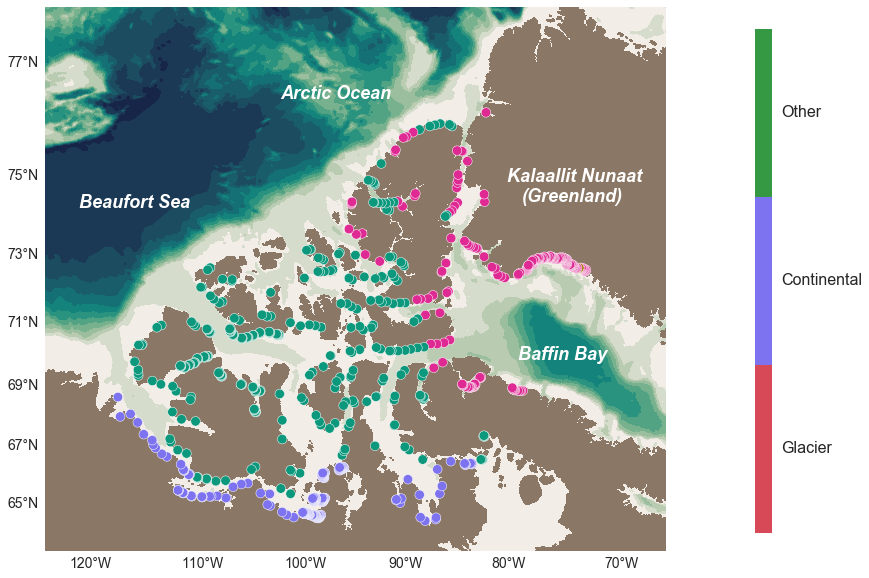

In [46]:
fig,ax = plt.subplots(figsize=(12,10))

proj=Basemap(projection='eqdc',lat_0 = 77.5, lon_0 = -95, resolution='i', width=2.8e6, height=2.45e6)#width=2.8e6, height=2.55e6)
# proj.drawcoastlines(linestyle='-', color=[0.35, 0.35, 0.35], linewidth=1, zorder=3)
proj.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0,fontsize=14)
proj.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0,fontsize=14)

# bathymetry:
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)
bath = proj.contourf(x_mesh, y_mesh, mesh_bathy,12, cmap=cmocean.cm.tempo)

# apply land mask:
x2, y2 = proj(mlons, mlats)
z2 = Z_masked[0,:,:]
cmap1 = matplotlib.colors.ListedColormap(["#8b7765"])
proj.pcolor(x2,y2,z2, vmin=-1, vmax = 0.3, cmap=cmap1)

# model rivers:
x_rf, y_rf = proj(lon_rf[1480:2050, 200:800], lat_rf[1480:2050, 200:800])
CS1 = proj.contourf(x_rf, y_rf, river_class[1480:2050, 200:800], clev, vmin=1,vmax=4, \
                    cmap=cmocean.cm.phase)#plt.cm.get_cmap('tab10'))
CS = proj.scatter(x_rf, y_rf, c=river_class[1480:2050, 200:800], vmin=0,vmax=4, s=90, \
                  edgecolor='w', cmap=cmocean.cm.phase, zorder=2, label= 'Rivers in model')

# station names:
text_x, text_y = proj(text_lon, text_lat)
text2_x, text2_y = proj(text2_lon, text2_lat) #lines
    
# features:
textx2, texty2 = proj(lon_features2, lat_features2)
for i in range(len(features2)):
    plt.text(textx2[i], texty2[i], features2[i], fontsize=18, fontweight='bold',fontstyle='italic', color='w', \
            )

#---------------------
cbaxes = fig.add_axes([0.975, 0.15, 0.02, 0.7]) 

CBar = plt.colorbar(CS1, ax=ax, cax=cbaxes) 
CBar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['Glacier','Continental','Other']):
    CBar.ax.text(1.5, (j+0.5)/3, lab, va='center', fontsize=16)
    
# ax.legend(fontsize=16, loc=1, frameon=True)
fig.savefig('trans_river_class.png',dpi=300, bbox_inches='tight', transparent=True)